## Taken all Columns as input and 'Abund' (Abundance) column as output

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # for plot visualization

In [3]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV, LogisticRegression, LogisticRegressionCV

In [6]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import re

import warnings
# ignoring all the warnings
warnings.filterwarnings("ignore")

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [12]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [13]:
import warnings
warnings.filterwarnings("ignore")
from python_utils import *

In [35]:
df = pd.read_csv('National Forest2_Bienville-short.csv')

In [15]:
df.head()

,Common Name,Scientific Name,Range,MR,%Cell,FIAsum,FIAiv,ChngCl45,ChngCl85,Adap,Abund,Capabil45,Capabil85,SSO,N
0,loblolly pine,Pinus taeda,WDH,High,97.8,4147.09,42.42,No change,No change,Medium,Abundant,Good,Good,1,1
1,sweetgum,Liquidambar styraciflua,WDH,High,100.0,1227.71,12.28,No change,No change,Medium,Abundant,Good,Good,1,2
2,water oak,Quercus nigra,WDH,High,94.4,824.16,8.73,Sm. inc.,Sm. inc.,Medium,Abundant,Very Good,Very Good,1,3
3,white oak,Quercus alba,WDH,Medium,69.7,292.81,4.20,No change,No change,High,Common,Good,Good,1,4
4,shortleaf pine,Pinus echinata,WDH,High,61.8,268.28,4.34,Lg. inc.,Lg. inc.,Medium,Common,Very Good,Very Good,1,5


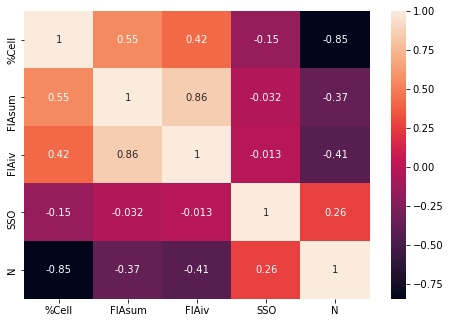

In [17]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
sns.heatmap(df.corr(), annot=True)

In [20]:
df.columns

Index(['Common Name', 'Scientific Name', 'Range', 'MR', '%Cell', 'FIAsum',
       'FIAiv', 'ChngCl45', 'ChngCl85', 'Adap', 'Abund', 'Capabil45',
       'Capabil85', 'SSO', 'N'],
      dtype='object')

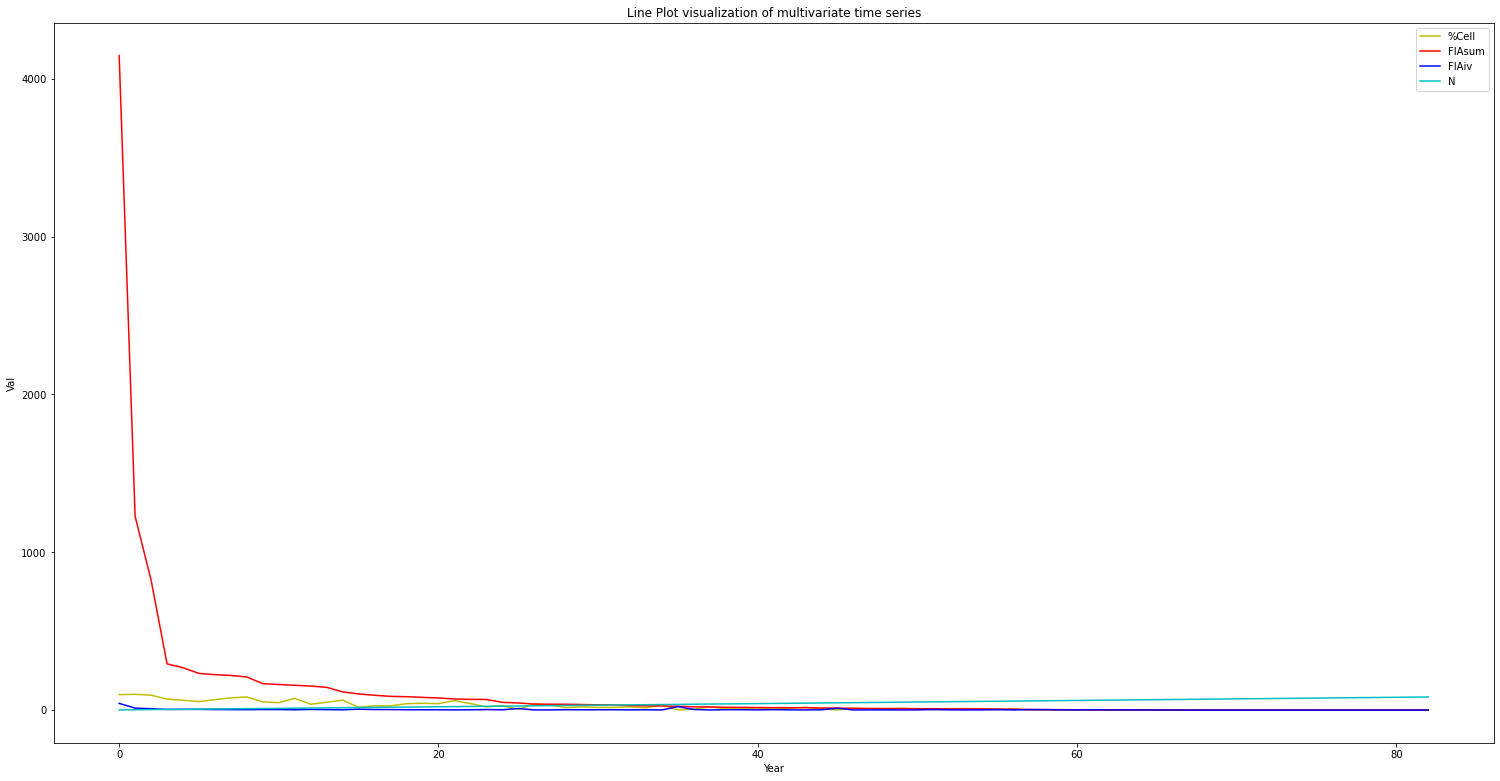

In [23]:
fig = plt.figure(figsize = (20, 10))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(df['%Cell'], data = df, color = 'y')
axes.plot(df['FIAsum'], data = df, color = 'r')
axes.plot(df['FIAiv'], data = df, color = 'b')
axes.plot(df['N'], data = df, color = 'c')
axes.set_title('Line Plot visualization of multivariate time series')
axes.set_xlabel('Year')
axes.set_ylabel('Val')
axes.legend()
fig.savefig('lineplot.png', bbox_inches = 'tight')

In [25]:
df.describe()

,%Cell,FIAsum,FIAiv,SSO,N
count,83.000000,83.000000,83.000000,83.000000,83.000000
mean,21.413253,119.948193,2.803735,1.084337,42.000000
std,26.662858,478.302048,5.437933,0.926636,24.103942
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.100000,1.595000,0.805000,0.000000,21.500000
50%,7.900000,15.360000,1.630000,1.000000,42.000000
75%,34.850000,73.400000,2.920000,1.000000,62.500000
max,100.000000,4147.090000,42.420000,3.000000,83.000000


In [27]:
df.dtypes

Common Name         object
Scientific Name     object
Range               object
MR                  object
%Cell              float64
FIAsum             float64
FIAiv              float64
ChngCl45            object
ChngCl85            object
Adap                object
Abund               object
Capabil45           object
Capabil85           object
SSO                  int64
N                    int64
dtype: object

In [28]:
df.isna().sum()

Common Name        0
Scientific Name    0
Range              0
MR                 0
%Cell              0
FIAsum             0
FIAiv              0
ChngCl45           0
ChngCl85           0
Adap               0
Abund              0
Capabil45          0
Capabil85          0
SSO                0
N                  0
dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = df[['Range', 'MR', 'ChngCl45','ChngCl85','Adap','Capabil45','Capabil85']].apply(le.fit_transform)

In [31]:
df.head()

,Range,MR,ChngCl45,ChngCl85,Adap,Capabil45,Capabil85
0,4,0,3,3,2,1,1
1,4,0,3,3,2,1,1
2,4,0,5,5,2,6,6
3,4,2,3,3,0,1,1
4,4,0,1,1,2,6,6


In [36]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Range'] = labelencoder.fit_transform(df['Range'])
df['MR'] = labelencoder.fit_transform(df['MR'])
df['ChngCl45'] = labelencoder.fit_transform(df['ChngCl45'])
df['ChngCl85'] = labelencoder.fit_transform(df['ChngCl85'])
df['Adap'] = labelencoder.fit_transform(df['Adap'])
df['Capabil45'] = labelencoder.fit_transform(df['Capabil45'])
df['Capabil85'] = labelencoder.fit_transform(df['Capabil85'])
df

,Common Name,Scientific Name,Range,MR,%Cell,FIAsum,FIAiv,ChngCl45,ChngCl85,Adap,Abund,Capabil45,Capabil85,SSO,N
0,loblolly pine,Pinus taeda,4,0,97.8,4147.09,42.42,3,3,2,Abundant,1,1,1,1
1,sweetgum,Liquidambar styraciflua,4,0,100.0,1227.71,12.28,3,3,2,Abundant,1,1,1,2
2,water oak,Quercus nigra,4,0,94.4,824.16,8.73,5,5,2,Abundant,6,6,1,3
3,white oak,Quercus alba,4,2,69.7,292.81,4.20,3,3,0,Common,1,1,1,4
4,shortleaf pine,Pinus echinata,4,0,61.8,268.28,4.34,1,1,2,Common,6,6,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,chinkapin oak,Quercus muehlenbergii,3,2,0.0,0.00,0.00,2,2,2,Absent,3,3,3,79
79,chestnut oak,Quercus prinus,0,0,0.0,0.00,0.00,6,6,0,Absent,5,5,0,80
80,bluejack oak,Quercus incana,3,1,0.0,0.00,0.00,2,2,2,Absent,3,3,3,81
81,black locust,Robinia pseudoacacia,0,1,0.0,0.00,0.00,6,6,2,Modeled,5,5,0,82


In [37]:
data_onehot_encoded = df.copy()
data_onehot_encoded = pd.get_dummies(data_onehot_encoded, columns=['Common Name'])
data = pd.get_dummies(data_onehot_encoded, columns=['Scientific Name'])
data

,Range,MR,%Cell,FIAsum,FIAiv,ChngCl45,ChngCl85,Adap,Abund,Capabil45,...,Scientific Name_Robinia pseudoacacia,Scientific Name_Salix nigra,Scientific Name_Sassafras albidum,Scientific Name_Sideroxylon lanuginosum ssp. lanuginosum,Scientific Name_Taxodium distichum,Scientific Name_Tilia americana,Scientific Name_Ulmus alata,Scientific Name_Ulmus americana,Scientific Name_Ulmus crassifolia,Scientific Name_Ulmus rubra
0,4,0,97.8,4147.09,42.42,3,3,2,Abundant,1,...,0,0,0,0,0,0,0,0,0,0
1,4,0,100.0,1227.71,12.28,3,3,2,Abundant,1,...,0,0,0,0,0,0,0,0,0,0
2,4,0,94.4,824.16,8.73,5,5,2,Abundant,6,...,0,0,0,0,0,0,0,0,0,0
3,4,2,69.7,292.81,4.20,3,3,0,Common,1,...,0,0,0,0,0,0,0,0,0,0
4,4,0,61.8,268.28,4.34,1,1,2,Common,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,3,2,0.0,0.00,0.00,2,2,2,Absent,3,...,0,0,0,0,0,0,0,0,0,0
79,0,0,0.0,0.00,0.00,6,6,0,Absent,5,...,0,0,0,0,0,0,0,0,0,0
80,3,1,0.0,0.00,0.00,2,2,2,Absent,3,...,0,0,0,0,0,0,0,0,0,0
81,0,1,0.0,0.00,0.00,6,6,2,Modeled,5,...,1,0,0,0,0,0,0,0,0,0


In [39]:
data.head()

,Range,MR,%Cell,FIAsum,FIAiv,ChngCl45,ChngCl85,Adap,Abund,Capabil45,...,Scientific Name_Robinia pseudoacacia,Scientific Name_Salix nigra,Scientific Name_Sassafras albidum,Scientific Name_Sideroxylon lanuginosum ssp. lanuginosum,Scientific Name_Taxodium distichum,Scientific Name_Tilia americana,Scientific Name_Ulmus alata,Scientific Name_Ulmus americana,Scientific Name_Ulmus crassifolia,Scientific Name_Ulmus rubra
0,4,0,97.8,4147.09,42.42,3,3,2,Abundant,1,...,0,0,0,0,0,0,0,0,0,0
1,4,0,100.0,1227.71,12.28,3,3,2,Abundant,1,...,0,0,0,0,0,0,0,0,0,0
2,4,0,94.4,824.16,8.73,5,5,2,Abundant,6,...,0,0,0,0,0,0,0,0,0,0
3,4,2,69.7,292.81,4.20,3,3,0,Common,1,...,0,0,0,0,0,0,0,0,0,0
4,4,0,61.8,268.28,4.34,1,1,2,Common,6,...,0,0,0,0,0,0,0,0,0,0


Rare        43
Common      21
Absent      13
Modeled      3
Abundant     3
Name: Abund, dtype: int64

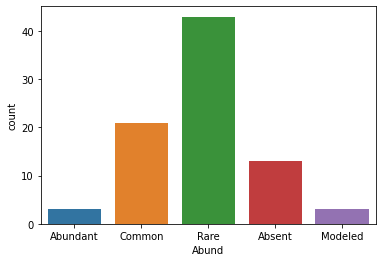

In [42]:
sns.countplot(x="Abund", data=data)
data.loc[:,'Abund'].value_counts()

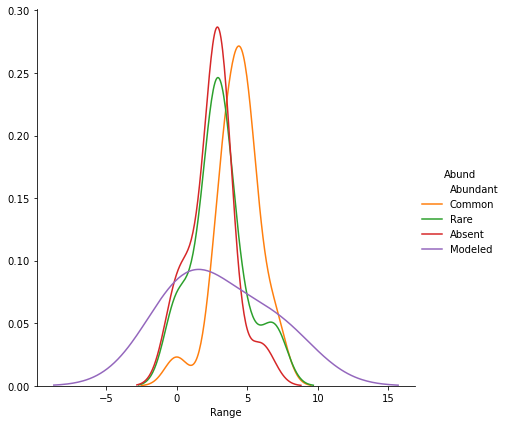

In [44]:
sns.FacetGrid(data, hue="Abund", size=6) \
   .map(sns.kdeplot, "Range") \
   .add_legend()

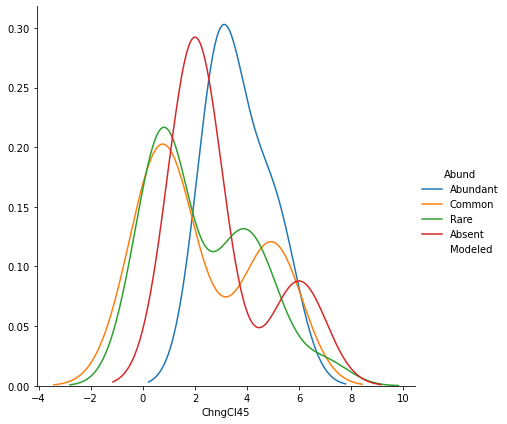

In [47]:
sns.FacetGrid(data, hue="Abund", size=6) \
   .map(sns.kdeplot, "ChngCl45") \
   .add_legend()

In [48]:
rand_state_ = 42
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Abund'], axis=1), data.Abund, test_size=0.3, random_state=rand_state_)

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [52]:
pipeline = Pipeline([('std_scalar', StandardScaler())])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [56]:
class EvaluateClassifier():
    def __init__(self):
        self.classifiers = {}

    def evaluate_model(self, modelName, train_predictions, test_predictions):
        self.classifiers[modelName] = {
            'train_score': accuracy_score(y_train, train_predictions),            
            'test_score': accuracy_score(y_test, test_predictions)
        }

    def fit_and_predict_using_RandomSearchCV(self, classifier, grid_params):
        random_cv_model = RandomizedSearchCV(estimator=classifier, param_distributions=grid_params, cv=10)
        random_cv_model.fit(X_train, y_train)
        self.evaluate_model(classifier.__class__.__name__, random_cv_model.predict(X_train), random_cv_model.predict(X_test))
        self.classifiers[classifier.__class__.__name__]['estimator'] = random_cv_model.estimator
        return self.classifiers[classifier.__class__.__name__]

    def voting_classifier(self, classifier_names):
        selected_classifiers = [(classifier_name, self.classifiers[classifier_name]['estimator']) for classifier_name in classifier_names]
        voting_classifier = VotingClassifier(estimators=selected_classifiers, voting='soft')
        voting_classifier.fit(X_train, y_train)
        self.evaluate_model(voting_classifier.__class__.__name__, voting_classifier.predict(X_train), voting_classifier.predict(X_test))
        self.classifiers[voting_classifier.__class__.__name__]['estimator'] = voting_classifier
        return self.classifiers[voting_classifier.__class__.__name__]

## Decision Tree

In [58]:
eval_classifier1 = EvaluateClassifier()

In [62]:
# Decision Tree
dt_grid_param = {
    'splitter': ['best', 'random'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3],
    'min_samples_split': [2, 3, 4],
    'max_features': ['sqrt'],
    'random_state': [rand_state_]
}

acc_dt = eval_classifier1.fit_and_predict_using_RandomSearchCV(DecisionTreeClassifier(), dt_grid_param)
acc_dt

{'train_score': 0.6896551724137931,
 'test_score': 0.68,
 'estimator': DecisionTreeClassifier()}

## Random Forest

In [64]:
eval_classifier2 = EvaluateClassifier()

In [66]:
rf_grid_param = {
    'n_estimators': [10, 30, 60, 90, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4],
    'min_samples_split': [2, 3, 4],
    'max_features': ['sqrt'],
    'random_state': [rand_state_]
}

acc_rf = eval_classifier2.fit_and_predict_using_RandomSearchCV(RandomForestClassifier(), rf_grid_param)
acc_rf

{'train_score': 0.9827586206896551,
 'test_score': 0.96,
 'estimator': RandomForestClassifier()}

## KNN Classifer

In [68]:
eval_classifier3 = EvaluateClassifier()

In [71]:
# KNN clasifier
knn_grid_params = {
    'n_neighbors': [5, 6, 7, 8, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

eval_classifier3.fit_and_predict_using_RandomSearchCV(KNeighborsClassifier(), knn_grid_params)

{'train_score': 0.9137931034482759,
 'test_score': 0.92,
 'estimator': KNeighborsClassifier()}

## Extra Trees Classifier

In [74]:
eval_classifier4 = EvaluateClassifier()

In [79]:
# Overfits the model 
eval_classifier4.fit_and_predict_using_RandomSearchCV(ExtraTreesClassifier(), {
    'n_estimators': [15, 25],
    'min_samples_split': [2, 3],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt']
})

{'train_score': 1.0, 'test_score': 1.0, 'estimator': ExtraTreesClassifier()}

## Ridge Classifier

In [81]:
eval_classifier5 = EvaluateClassifier()

In [85]:
# RidgeClassifier
eval_classifier5.fit_and_predict_using_RandomSearchCV(RidgeClassifier(), {
    'alpha': [0.8, 1, 7, 13, 17],
    'random_state': [rand_state_]
})

{'train_score': 1.0, 'test_score': 0.68, 'estimator': RidgeClassifier()}

## Logistic Regression

In [87]:
eval_classifier6 = EvaluateClassifier()

In [90]:
eval_classifier6.fit_and_predict_using_RandomSearchCV(LogisticRegression(), {
    'C': [0.5, 1.0, 1,5],
    'random_state': [rand_state_],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50, 100, 150],
    'multi_class': ['auto'],
    'warm_start': [True]
})

{'train_score': 1.0, 'test_score': 0.64, 'estimator': LogisticRegression()}

## Gradient Boosting

In [93]:
eval_classifier7 = EvaluateClassifier()

In [95]:
# GradientBoostingClassifier - Overfit the model, not feasible

eval_classifier7.fit_and_predict_using_RandomSearchCV(GradientBoostingClassifier(), {
    'loss': ['deviance', 'exponential'],
    'n_estimators': [100, 120, 150],
    'random_state': [rand_state_],
    'min_samples_split': [2, 3, 4],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4]
})

{'train_score': 1.0,
 'test_score': 1.0,
 'estimator': GradientBoostingClassifier()}

## Took Random Forest classifier as the best performer

In [97]:
import pickle
filename = 'National Forest2_Bienville-short.pkl'
pickle.dump(eval_classifier2, open(filename, 'wb'))